# Introduction to uDALES Post-processing with Python

This tutorial describes how to read and process data from the LES code uDALES using Python. This tutorial introduces the `UDBase` post-processing class.

## Overview

The **UDBase** post-processing class reads simulation parameters and contains methods to load field and facet data.

**Field data methods:**
- `load_stat_xyt`: Load 1D slab- and time-averaged statistics
- `load_stat_t`: Load 3D time-averaged statistics
- `load_field`: Load instantaneous 3D data
- `load_slice`: Load instantaneous 2D slices

**Facet data methods:**
- `calculate_frontal_properties`: Calculate skylines, frontal areas, blockage ratios
- `plot_fac_type`: Display surface types
- `assign_prop_to_fac`: Assign properties to facets
- `plot_fac`: Display variables on mesh
- `load_fac_momentum`: Load pressure and shear stresses
- `load_fac_eb`: Load energy balance terms
- `load_seb`: Load all SEB terms
- `load_fac_temperature`: Load facet temperatures
- `area_average_seb`, `area_average_fac`: Area averaging
- `time_average`: Time averaging
- `convert_fac_to_field`: Convert facet to 3D field

## 1. Import Libraries and Setup

In [2]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# Add the uDALES python path
udbase_path = Path("C:/Users/mvr/OneDrive - Imperial College London/codes/uDALES/u-dales").resolve()
tools_path = (udbase_path / "tools" / "python").resolve()
if tools_path not in sys.path:
    sys.path.insert(0, str(tools_path))

from udbase import UDBase

# Enable interactive plots
%matplotlib widget

## 2. Initializing UDBase

The starting point is that you have run a simulation and merged the output files. The uDALES postprocessing class is called `UDBase`.

In [3]:
help(UDBase)

Help on class UDBase in module udbase:

class UDBase(builtins.object)
 |  UDBase(expnr: Union[int, str], path: Union[str, pathlib.Path, NoneType] = None, load_geometry: bool = True, suppress_load_warnings: bool = False)
 |
 |  Post-processing class for uDALES simulations.
 |
 |  This class provides methods to load and analyze uDALES simulation outputs,
 |  including field data, statistics, facet data, and geometry.
 |
 |  Parameters
 |  ----------
 |  expnr : int or str
 |      Experiment number
 |  path : str or Path, optional
 |      Path to experiment directory. Defaults to current directory.
 |  load_geometry : bool, optional
 |      If True, load STL geometry when available.
 |
 |  Examples
 |  --------
 |  >>> sim = UDBase(expnr=65, path='experiments/065')
 |  >>> u_field = sim.load_field('u')
 |  >>> stats = sim.load_stat_xyt('u')
 |
 |  Methods defined here:
 |
 |  __init__(self, expnr: Union[int, str], path: Union[str, pathlib.Path, NoneType] = None, load_geometry: bool = True

You can initialize it by providing the path to your simulation output directory.

In [4]:
# Create an instance of the UDBase class
expnr = '065'
expdir = (udbase_path.parents[0] / "experiments" / expnr).resolve
sim = UDBase(expnr, expdir)

Loaded geometry: 2658 faces, 1411 vertices


## Constructor Information

The constructor can have a number of input parameters. Use `help()` to view the documentation:

In [5]:
help(UDBase.__init__)

Help on function __init__ in module udbase:

__init__(self, expnr: Union[int, str], path: Union[str, pathlib.Path, NoneType] = None, load_geometry: bool = True, suppress_load_warnings: bool = False)
    Initialize a UDBase instance.

    Parameters
    ----------
    expnr : int or str
        Experiment number. Converted to a zero-padded 3-digit string.
    path : str or Path, optional
        Path to the experiment directory. Defaults to current working directory.
    load_geometry : bool, optional
        If True, load STL geometry when available.
    suppress_load_warnings : bool, optional
        If True, suppress missing-file warnings during constructor loading.

    Attributes
    ----------
    expnr : str
        Experiment number as a zero-padded string.
    path : Path
        Base path to the experiment directory.
    geom : UDGeom or None
        Loaded geometry instance when STL is present and load_geometry is True.
    facs : dict
        Facet data (e.g., area, typeid, 

## 3. Accessing Simulation Properties

Once initialized, you can access simulation parameters and grid coordinates as properties.

In [6]:
# To view all simulation input parameters, simply type:
sim

UDBase(expnr='065')
  path: C:\Users\mvr\OneDrive - Imperial College London\codes\uDALES\experiments\065
  grid: 64 x 64 x 64
  domain: 64 x 64 x 64
  geometry: loaded
  facets: 2658
  Dsky: 107.2
  GRLAI: 2.1
  I: 814
  Sc: ndarray[bool] shape=(64, 64, 64)
  Su: ndarray[bool] shape=(64, 64, 64)
  Sv: ndarray[bool] shape=(64, 64, 64)
  Sw: ndarray[bool] shape=(64, 64, 64)
  _lffacet_sections: True
  _lffacetarea: True
  _lffacets: True
  _lffactypes: True
  _lfgeom: True
  _lfprof: True
  _lfsolid: True
  _lftrees: False
  _namelist_map: dict
  _suppress_load_warnings: False
  bldT: 298.0
  cpath: WindowsPath
  diag_neighbs: False
  dtEB: 1
  dtfac: 10
  dtmax: 5
  dx: 1.0
  dy: 1.0
  dzm: ndarray[float64] shape=(64,)
  dzt: ndarray[float64] shape=(64,)
  expnr: 065
  facT: 301
  facs: dict
  facsec: dict
  factypes: dict
  fieldvars: v0,th,qt,u0,w0
  flrT: 298.0
  fraction: 0.5
  geom: UDGeom
  iadv_qt: 2
  iadv_thl: 2
  iexpnr: 65
  igrw_damp: 0
  ipoiss: 0
  irandom: 43
  itot: 64
 

In [7]:
# Access simulation properties
sim.xlen

64

## 4. Geometry Visualization

If a geometry file (STL) is present, UDBase automatically loads it and provides access to geometry properties and visualization capabilities.

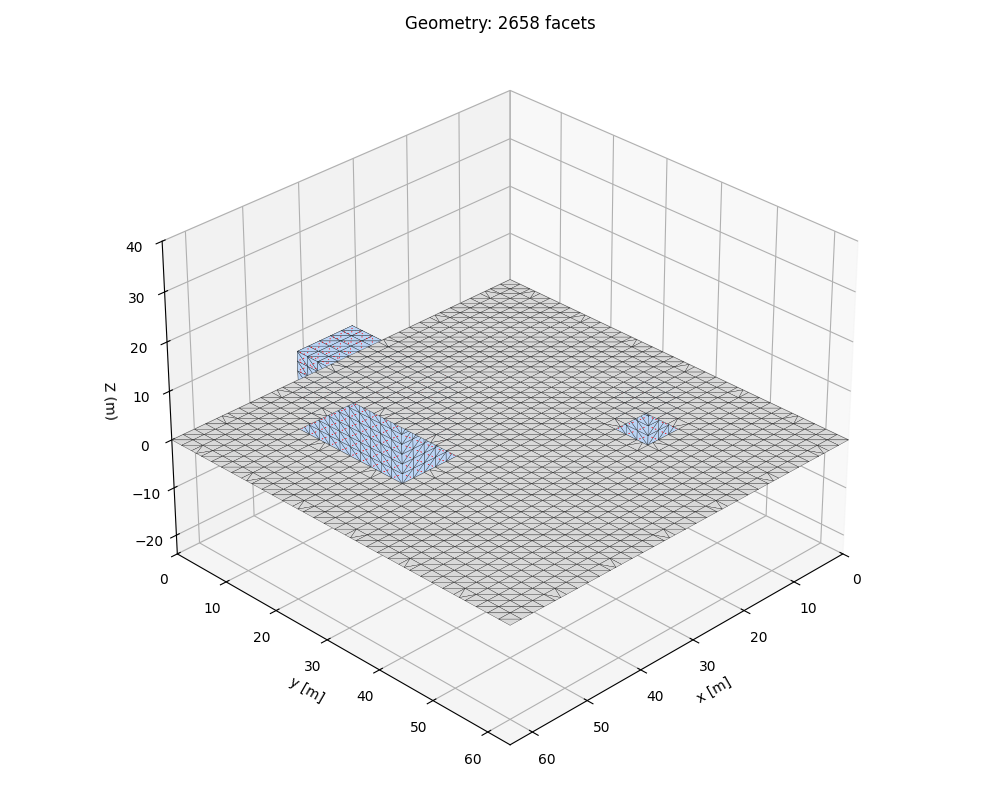

Text(-0.05043535241702284, 0.5, 'y [m]')

In [8]:
# Visualize geometry
sim.geom.show()
plt.xlabel('x [m]')
plt.ylabel('y [m]')

## 5. Available Methods

The UDBase class provides comprehensive methods for loading and analyzing simulation data:

**Field loading methods:**
- `load_field(var, time=None)` - Load 3D instantaneous field data
- `load_stat_xyt(var, time=None)` - Load 1D slab- and time-averaged statistics
- `load_stat_t(var)` - Load 3D time-averaged statistics
- `load_slice(slice_type, var, time=None)` - Load 2D slice data

**Facet loading methods:**
- `load_fac_momentum(time=None)` - Load momentum surface data
- `load_fac_eb(time=None)` - Load surface energy balance data
- `load_fac_temperature(time=None)` - Load facet temperature data
- `load_seb(time=None)` - Load all SEB terms

**Analysis methods:**
- `assign_prop_to_fac(prop)` - Assign properties to facets
- `area_average_fac(data, areas)` - Area-average over facets
- `area_average_seb(seb_dict, facet_type=None)` - Area-average SEB terms
- `time_average(data, axis=-1)` - Time-average data (static method)
- `convert_fac_to_field(fac_data, method='nearest')` - Convert facet to field
- `calculate_frontal_properties(direction='x')` - Calculate frontal area

**Visualization methods:**
- `plot_fac(data, building_ids=None)` - Plot facet data
- `plot_fac_type(building_ids=None)` - Plot facet types
- `plot_veg()` - Plot tree regions
- `plot_building_ids()` - Plot building IDs
- `plot_2dmap(val, labels=None)` - Plot 2D building map